In [3]:
import os
import glob
import pandas as pd

data_path = '/home/alexandresayal/Downloads/Results_stability_masks_5classes/top1000voxels_pred'

# Load all csv files
all_files = glob.glob(f"{data_path}/*.csv")
all_files.sort()
all_files

# number of files
n_subjects = len(all_files)


In [4]:
# Iterate over all files to fetch stability values and store them in a matrix (row x subject)

stability = pd.DataFrame()

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)

    # get sub name
    sub_name = file.split('/')[-1][:6]

    # get stability values
    stability_values = df['stability'].values

    # add column with subject name
    stability[sub_name] = stability_values

stability

,sub-01,sub-02,sub-03,sub-04,sub-07,sub-08,sub-09,sub-10,sub-11,sub-12,sub-13,sub-14,sub-15,sub-16,sub-17,sub-18,sub-19,sub-20
0,0.769696,0.774715,0.722744,0.613080,0.866742,0.816081,0.777089,0.771794,0.802714,0.723245,0.841157,0.805519,0.838973,0.789215,0.790721,0.852969,0.862472,0.847136
1,0.766856,0.763969,0.721636,0.568053,0.866617,0.810554,0.750462,0.755586,0.799560,0.689108,0.841094,0.757930,0.836683,0.779832,0.784235,0.837690,0.857910,0.841624
2,0.764181,0.761281,0.650010,0.531243,0.862941,0.809734,0.745073,0.713601,0.791910,0.649328,0.837292,0.742085,0.832283,0.758294,0.770390,0.830024,0.855260,0.840557
3,0.733655,0.746139,0.647660,0.526620,0.861549,0.803767,0.739579,0.711128,0.791555,0.639095,0.835526,0.740918,0.829555,0.725181,0.760375,0.822258,0.850720,0.832863
4,0.732582,0.741393,0.636971,0.522619,0.857896,0.802620,0.730928,0.707755,0.790303,0.630761,0.829442,0.720412,0.829498,0.718852,0.758370,0.813301,0.850691,0.831328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.284302,0.290407,0.254025,0.250737,0.482651,0.318127,0.327949,0.271470,0.410035,0.281408,0.406050,0.279067,0.345602,0.286463,0.297841,0.371720,0.369592,0.351749
996,0.284288,0.290397,0.254019,0.250735,0.482633,0.318053,0.327934,0.271460,0.409778,0.281402,0.405804,0.278978,0.345517,0.286400,0.297777,0.371460,0.369562,0.351686
997,0.284130,0.290362,0.253919,0.250654,0.482217,0.318037,0.327880,0.271439,0.409689,0.281312,0.405797,0.278874,0.345445,0.286197,0.297714,0.371367,0.369426,0.351563
998,0.283931,0.290338,0.253878,0.250642,0.482130,0.317900,0.327755,0.271374,0.409043,0.281189,0.405784,0.278391,0.345361,0.286186,0.297638,0.371287,0.369296,0.351076


array([[<Axes: title={'center': 'sub-01'}>,
        <Axes: title={'center': 'sub-02'}>,
        <Axes: title={'center': 'sub-03'}>,
        <Axes: title={'center': 'sub-04'}>],
       [<Axes: title={'center': 'sub-07'}>,
        <Axes: title={'center': 'sub-08'}>,
        <Axes: title={'center': 'sub-09'}>,
        <Axes: title={'center': 'sub-10'}>],
       [<Axes: title={'center': 'sub-11'}>,
        <Axes: title={'center': 'sub-12'}>,
        <Axes: title={'center': 'sub-13'}>,
        <Axes: title={'center': 'sub-14'}>],
       [<Axes: title={'center': 'sub-15'}>,
        <Axes: title={'center': 'sub-16'}>,
        <Axes: title={'center': 'sub-17'}>, <Axes: >]], dtype=object)

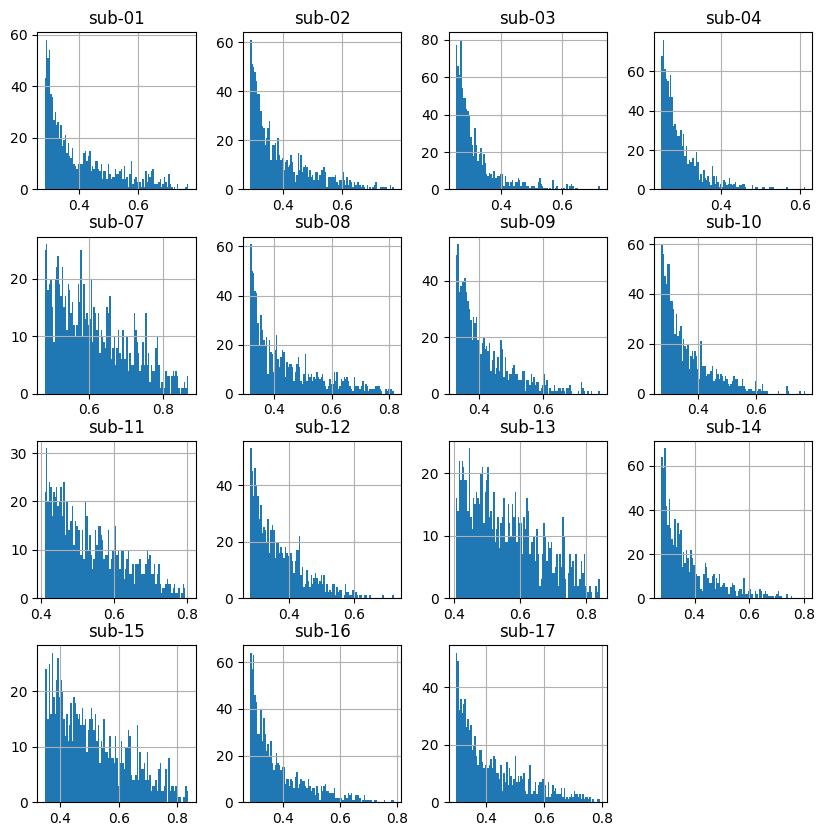

In [25]:
# plot histogram of stability
stability.hist(bins=100, figsize=(10, 10))

Text(0, 0.5, 'Average number of voxels')

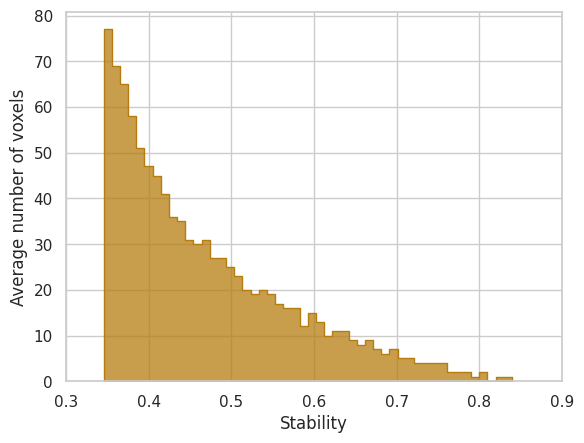

In [9]:
# sum all subjects per row and plot histogram with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

stability['sum'] = stability.sum(axis=1) / n_subjects

sns.set_theme(style="whitegrid")
sns.histplot(data=stability, x='sum', bins=50, color='#B67D0E', stat='count', element='step', kde=False)

plt.xlabel('Stability')
plt.xlim(0.3, 0.9)
plt.ylabel('Average number of voxels')